In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\Sujan H G\Downloads\shark tank\Shark Tank India Dataset.csv")

In [3]:
data.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [4]:
data.isnull().sum()

episode_number           0
pitch_number             0
brand_name               0
idea                     0
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   deal                   117 non-null    int64  
 5   pitcher_ask_amount     117 non-null    float64
 6   ask_equity             117 non-null    float64
 7   ask_valuation          117 non-null    float64
 8   deal_amount            117 non-null    float64
 9   deal_equity            117 non-null    float64
 10  deal_valuation         117 non-null    float64
 11  ashneer_present        117 non-null    int64  
 12  anupam_present         117 non-null    int64  
 13  aman_present           117 non-null    int64  
 14  namita_present         117 non-null    int64  
 15  vineet

In [11]:
data.columns

Index(['episode_number', 'pitch_number', 'brand_name', 'idea', 'deal',
       'pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'deal_amount',
       'deal_equity', 'deal_valuation', 'ashneer_present', 'anupam_present',
       'aman_present', 'namita_present', 'vineeta_present', 'peyush_present',
       'ghazal_present', 'ashneer_deal', 'anupam_deal', 'aman_deal',
       'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal',
       'total_sharks_invested', 'amount_per_shark', 'equity_per_shark'],
      dtype='object')

DATA ANALYSIS

1. Pitch Success
2. Shark Behavior
3.  Industry Trends
4. Valuation Analysis


Pitch Success Analysis

In [13]:
# Calculate Deal Success Rate
deal_success_rate = (data['deal'].sum() / len(data)) * 100
print("Deal Scuccess Rate is:",deal_success_rate,"%")

Deal Scuccess Rate is: 55.55555555555556 %


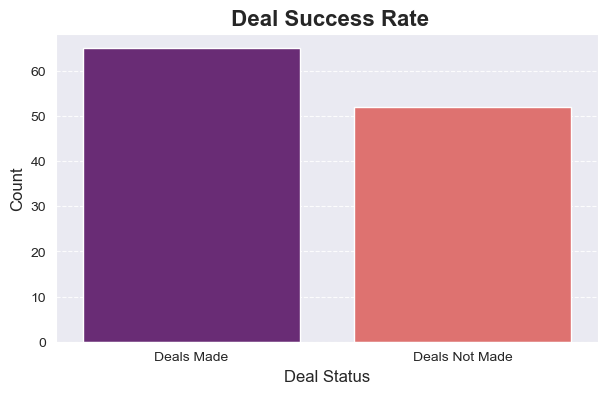

In [73]:
sns.set_style("dark")
sns.set_palette("Set2")  # Use a color palette that is more visually appealing
plt.figure(figsize=(7, 4))  # Slightly larger for better clarity
sns.barplot(x=['Deals Made', 'Deals Not Made'], y=data['deal'].value_counts(), palette="magma")
plt.grid(True, axis='y', linestyle='--', alpha=0.9)
plt.title(' Deal Success Rate', fontsize=16, fontweight='bold')
plt.xlabel('Deal Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

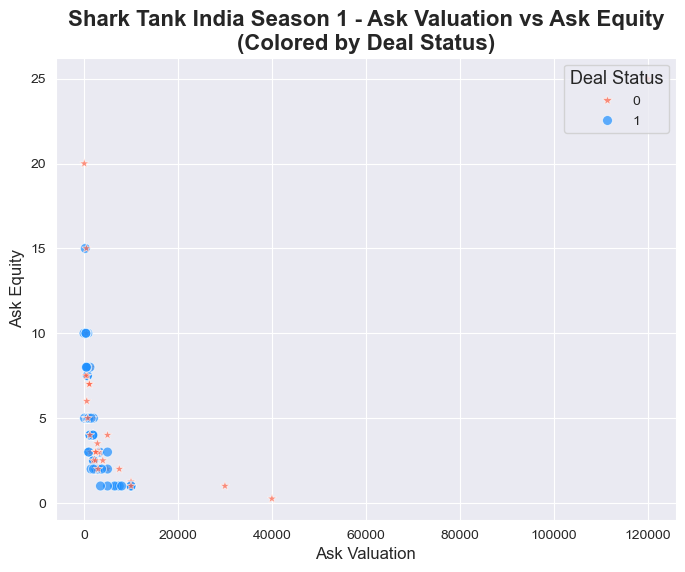

In [51]:
plt.figure(figsize=(8, 6))
plt.grid()
sns.scatterplot(x='ask_valuation', y='ask_equity', 
                hue='deal', data=data, 
                palette={1: 'dodgerblue', 0: 'tomato'}, 
                style='deal', markers={1: 'o', 0: '*'}, 
                s=50, alpha=0.7)  

plt.title('Shark Tank India Season 1 - Ask Valuation vs Ask Equity\n(Colored by Deal Status)', fontsize=16, fontweight='bold')
plt.xlabel('Ask Valuation', fontsize=12)
plt.ylabel('Ask Equity', fontsize=12)

plt.legend(title='Deal Status', title_fontsize='13', loc='upper right')
plt.show()

Top-10 High Equity Dilution Deal

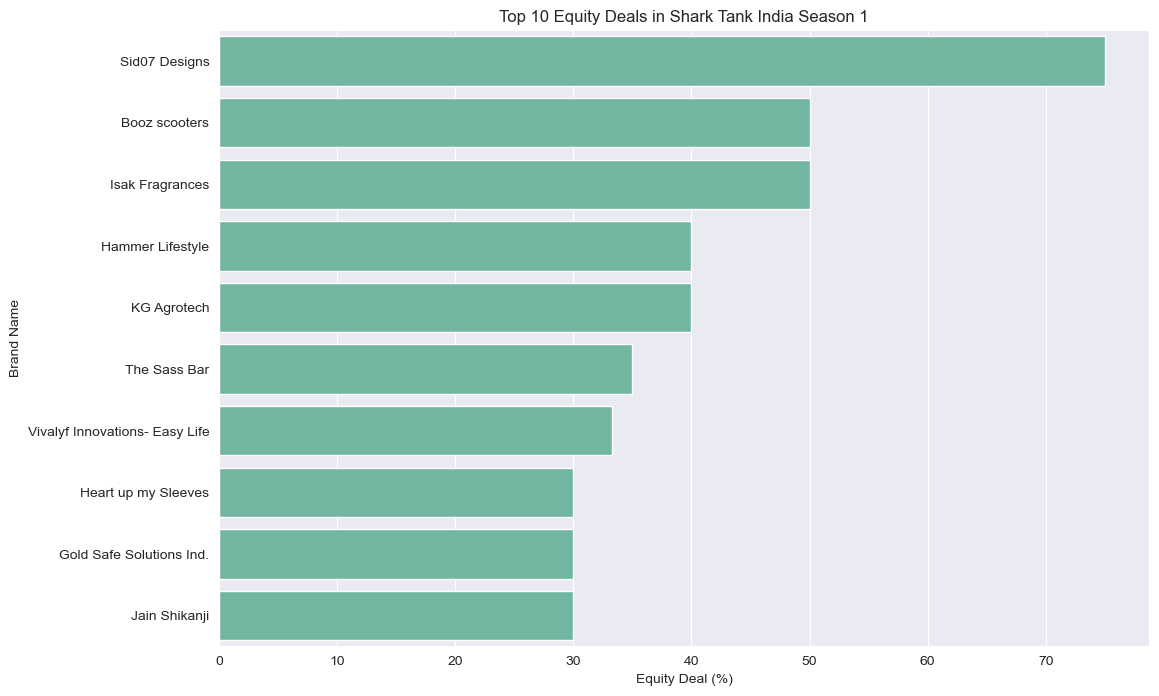

In [162]:
top_10_equity_deals = data.nlargest(10, 'deal_equity')

plt.figure(figsize=(12, 8))
plt.grid()
sns.barplot(x='deal_equity', y='brand_name', data=top_10_equity_deals)
plt.xlabel('Equity Deal (%)')
plt.ylabel('Brand Name')
plt.title('Top 10 Equity Deals in Shark Tank India Season 1')
plt.show()

Shark Behavior analysis

In [55]:
# 1. Shark Investment Patterns
shark_investments = data.groupby(['ashneer_deal', 'anupam_deal', 'aman_deal', 'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal']).size().reset_index(name='Investments')

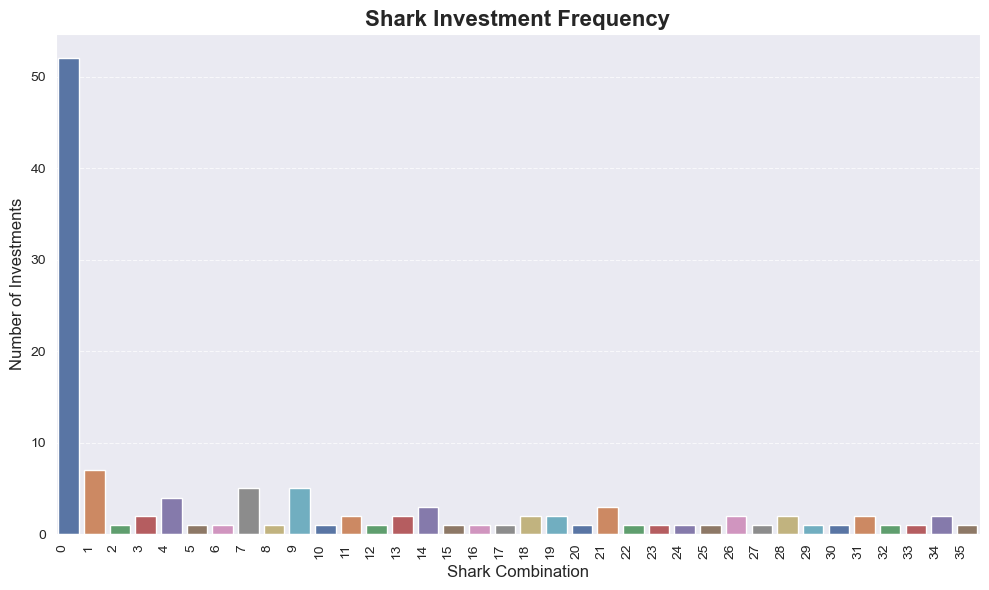

In [75]:
sns.set_style("dark")
plt.figure(figsize=(10, 6))

# Plot the bar chart using seaborn with a more vibrant color palette
sns.barplot(x=shark_investments.index, y=shark_investments['Investments'], palette="deep")

# Rotate the x-axis labels if needed for better readability
plt.xticks(rotation=90, ha='right', fontsize=10)

# Set the title and labels with enhanced font size and style
plt.title('Shark Investment Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Shark Combination', fontsize=12)
plt.ylabel('Number of Investments', fontsize=12)

# Add gridlines on the y-axis for better clarity
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Tighten layout to avoid label clipping
plt.tight_layout()

# Show the plot
plt.show()

Number of Deals done by Individual Sharks

In [194]:
num_deal_shark = [data.ashneer_deal.sum(), data.anupam_deal.sum(), data.aman_deal.sum(), data.namita_deal.sum(), data.ghazal_deal.sum(), data.peyush_deal.sum(), data.vineeta_deal.sum()]
all_sharks = ['Ashneer', 'Anupam', 'Aman', 'Namita', 'Ghazal', 'Peyush', 'Vineeta']


In [198]:
shark_data = pd.DataFrame({
    'Shark': all_sharks,
    'Deals': num_deal_shark
})

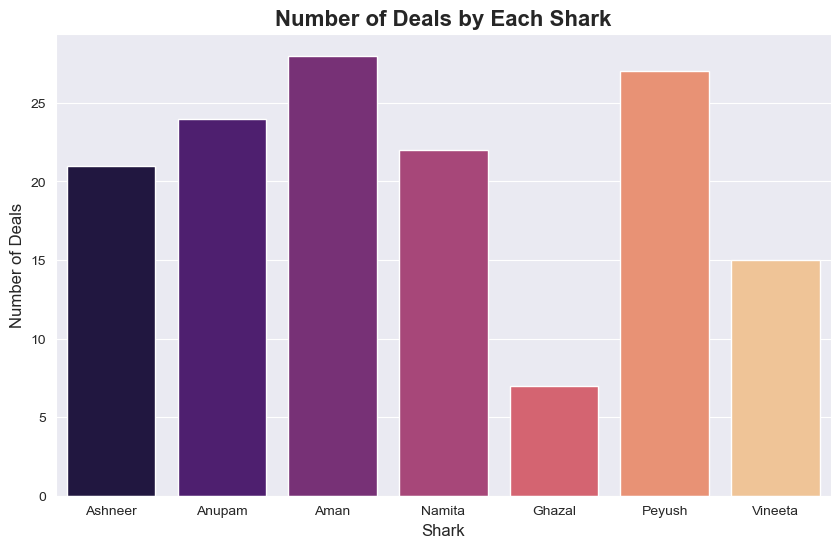

In [205]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(x='Shark', y='Deals', data=shark_data, palette='magma')
plt.title('Number of Deals by Each Shark', fontsize=16, fontweight='bold')
plt.xlabel('Shark', fontsize=12)
plt.ylabel('Number of Deals', fontsize=12)
plt.show()

Total Investment in 5-Sharks Deals

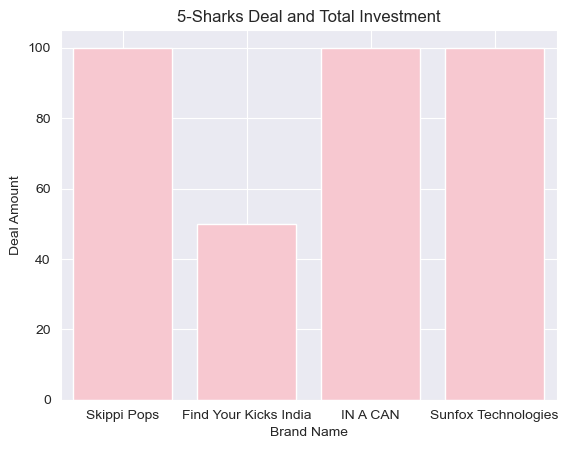

In [184]:
total_shark = data[data['total_sharks_invested'] == 5]
sns.barplot(x=total_shark["brand_name"],y=total_shark["deal_amount"],color="pink")
plt.grid()
plt.title("5-Sharks Deal and Total Investment")
plt.xlabel("Brand Name")
plt.ylabel("Deal Amount")
plt.show()

Industries analysis

In [89]:
# 2. Investment Trends
industry_deals = data[data['deal'] == 1].groupby('brand_name')['deal_amount'].mean()

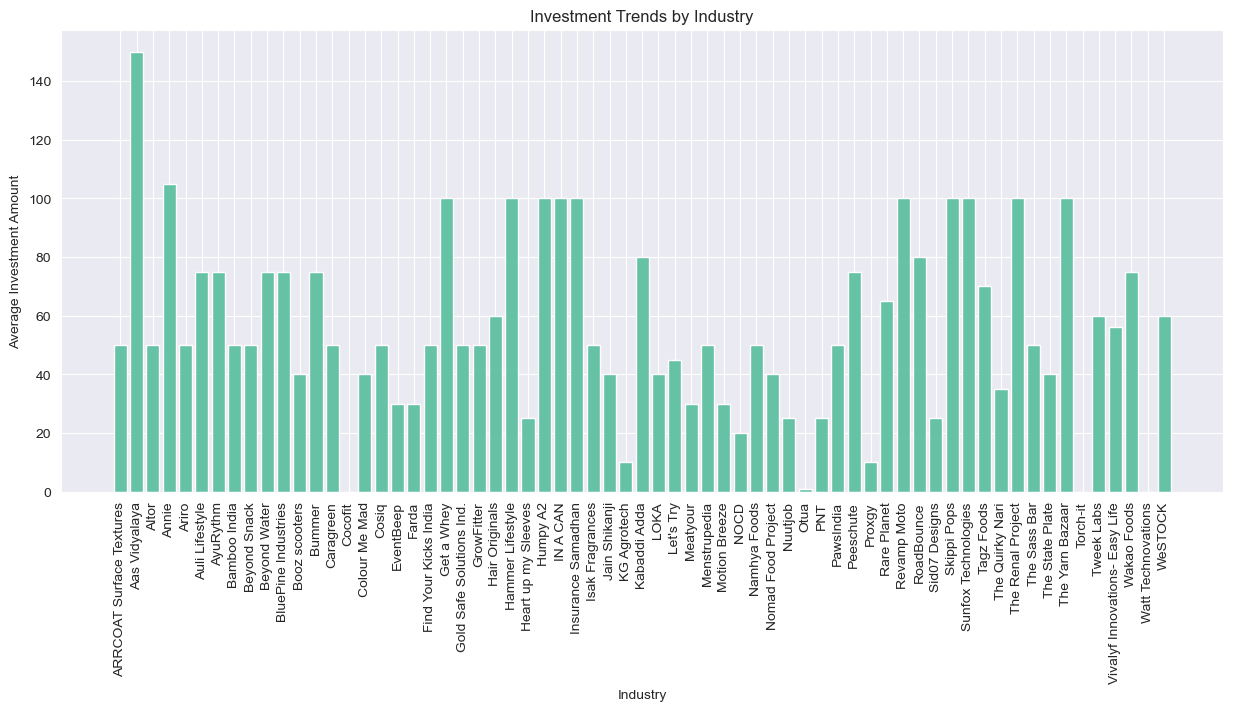

In [93]:
# Visualize investment trends
plt.figure(figsize=(15, 6))
plt.grid()
plt.bar(industry_deals.index, industry_deals)
plt.xlabel('Industry')
plt.ylabel('Average Investment Amount')
plt.title('Investment Trends by Industry')
plt.xticks(rotation=90)
plt.show()


Valuation Analysis

In [126]:
# 1. Valuation Gaps
valuation_gaps = data['ask_valuation'] - data['deal_valuation']

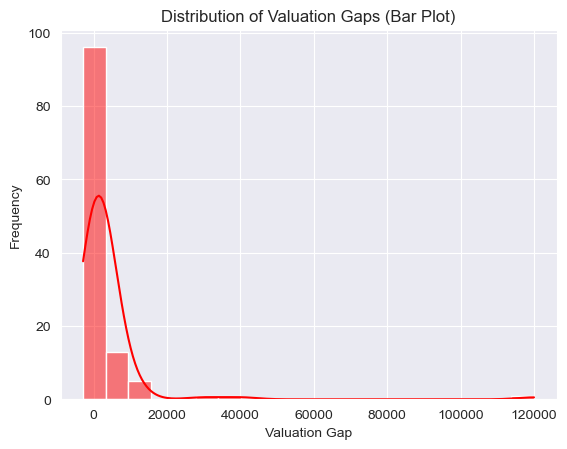

In [136]:
sns.set_style("dark")
plt.grid()
sns.histplot(data=valuation_gaps, bins=20, kde=True,color="red")
plt.xlabel('Valuation Gap')
plt.ylabel('Frequency')
plt.title('Distribution of Valuation Gaps (Bar Plot)')
plt.show()

In [139]:
# Calculate the percentage difference between Ask Valuation and Deal Valuation
data['Valuation_Gap_Percentage'] = ((data['ask_valuation'] - data['deal_valuation']) / data['ask_valuation']) * 100

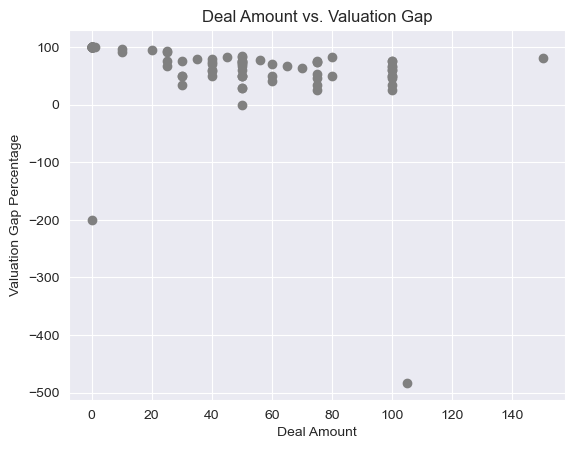

In [151]:
# Visualize the relationship between Deal Amount and Valuation Gap
plt.scatter(data['deal_amount'], data['Valuation_Gap_Percentage'],color="gray")
plt.grid()
plt.xlabel('Deal Amount')
plt.ylabel('Valuation Gap Percentage')
plt.title('Deal Amount vs. Valuation Gap')
plt.show()

In [153]:
# 2. Shark-Specific Tactics
# Group the data by shark presence and calculate average valuation gap
shark_negotiation_tactics = data.groupby(['ashneer_deal', 'anupam_deal', 'aman_deal', 'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal'])['Valuation_Gap_Percentage'].mean().reset_index(name='Average_Gap')

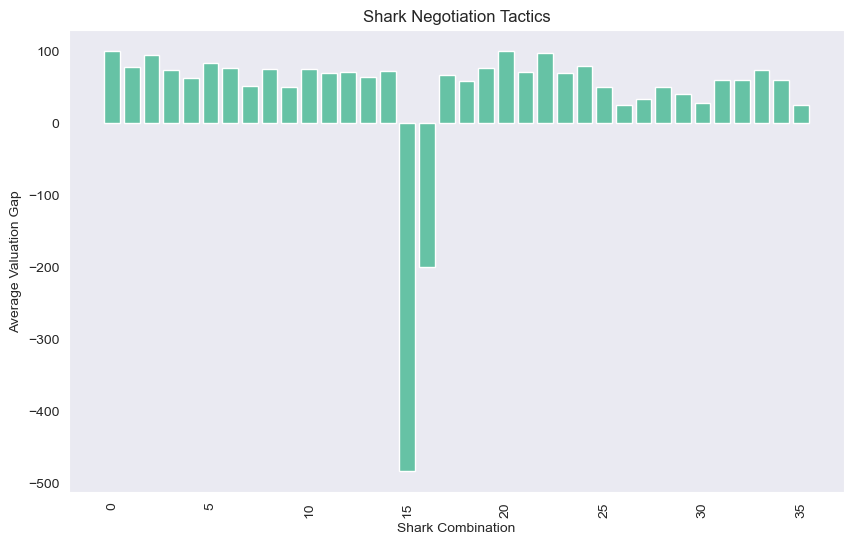

In [155]:
# Visualize shark-specific negotiation tactics
plt.figure(figsize=(10, 6))
plt.bar(shark_negotiation_tactics.index, shark_negotiation_tactics['Average_Gap'])
plt.xlabel('Shark Combination')
plt.ylabel('Average Valuation Gap')
plt.title('Shark Negotiation Tactics')
plt.xticks(rotation=90)
plt.show()